In [2]:
import pandas as pd
unames = ["user_id", "gender","age","occupation", "zip"]

In [6]:
users = pd.read_table("users.dat", sep= "::", names = unames,header = None) 

C:\Users\cx\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [7]:
users.head()

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [8]:
rnames = ["user_id","movie_id", "rating", "timestamp"]

In [25]:
ratings = pd.read_table("ratings.dat",sep= "::",header = None, names = rnames)

C:\Users\cx\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [26]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [27]:
mnames = ['movie_id', 'title', 'genres']

In [28]:
movies = pd.read_table("movies.dat", sep = "::", header= None, names = mnames)

C:\Users\cx\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [29]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [30]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [35]:
data = pd.merge(pd.merge(ratings, users), movies)

In [36]:
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [38]:
data.ix[0]

C:\Users\cx\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [45]:
mean_ratings = data.pivot_table('rating',index = 'title',columns=  'gender', aggfunc = 'mean')
mean_ratings.head()

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [49]:
rating_by_title = data.groupby("title").size()

In [56]:
type(rating_by_title[:10])

pandas.core.series.Series

In [54]:
active_titles = rating_by_title.index[rating_by_title >= 250]

In [55]:
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [57]:
mean_ratings = mean_ratings.loc[active_titles]

In [59]:
mean_ratings.head()

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421


In [61]:
top_female_ratings = mean_ratings.sort_index(by ="F", ascending = False )

C:\Users\cx\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


In [63]:
top_female_ratings.head()

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415


In [65]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

In [67]:
sorted_by_diff = mean_ratings.sort_index(by = 'diff')

C:\Users\cx\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


In [68]:
sorted_by_diff.head()

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777


In [70]:
rating_std_by_title = data.groupby('title')['rating'].std()

In [80]:
data.groupby('title')

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
1725,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
1726,23,661,2,978460739,M,35,0,90049,James and the Giant Peach (1996),Animation|Children's|Musical
1727,49,661,3,977972750,M,18,12,77084,James and the Giant Peach (1996),Animation|Children's|Musical
1728,53,661,5,977979726,M,25,0,96931,James and the Giant Peach (1996),Animation|Children's|Musical
1729,57,661,4,977935511,M,18,19,30350,James and the Giant Peach (1996),Animation|Children's|Musical


In [87]:
names1880 = pd.read_csv('C:\\Users\\cx\\Documents\\Python Scripts\\pydata-book-2nd-edition\\datasets\\babynames\\yob1880.txt'
                       ,names = ['name','sex','birth'])

In [88]:
names1880.head()

,name,sex,birth
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [96]:
names1880.groupby("sex").birth.sum()

sex
F     90993
M    110493
Name: birth, dtype: int64

In [92]:
len(names1880.index)

2000

In [93]:
90993+110493

201486

In [97]:
years = range(1880,2011)

In [98]:
pieces = []
columns = ['names','sex','birth']

for year in years:
    path ='C:\\Users\\cx\\Documents\\Python Scripts\\pydata-book-2nd-edition\\datasets\\babynames\\yob%d.txt'%year
    frame = pd.read_csv(path, names = columns)
    frame["year"] = year
    pieces.append(frame)

In [100]:
names = pd.concat(pieces, ignore_index= True)

In [105]:
names[2000:2006]

,names,sex,birth,year
2000,Mary,F,6919,1881
2001,Anna,F,2698,1881
2002,Emma,F,2034,1881
2003,Elizabeth,F,1852,1881
2004,Margaret,F,1658,1881
2005,Minnie,F,1653,1881


In [110]:
total_birth = names.pivot_table('birth', index ="year", columns= "sex", aggfunc = sum)

In [111]:
total_birth.head()

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445


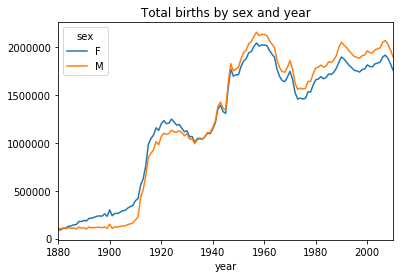

In [114]:
%matplotlib inline
total_birth.plot(title = "Total births by sex and year")

In [115]:
3/7

0.42857142857142855

In [116]:
def add_prop(group):
    group['prop'] = group.birth / group.birth.sum()
    return group

In [117]:
names = names.groupby(["year","sex"]).apply(add_prop)

In [142]:
nameof1880 = names.loc[names.year == 1880]
nameof1880.loc[nameof1880.sex == "M"].prop.sum()

1.0000000000000016

In [130]:
names.prop.sum()

262.0000000003014

In [132]:
def get_top1000(group):
    return group.sort_index(by= "birth", ascending = False)[:1000]

grouped = names.groupby(["sex","year"])
top1000 = grouped.apply(get_top1000)

C:\Users\cx\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  


In [134]:
top1000

names sex  birth  year      prop
sex year                                              
F   1880 0             Mary   F   7065  1880  0.077643
         1             Anna   F   2604  1880  0.028618
         2             Emma   F   2003  1880  0.022013
         3        Elizabeth   F   1939  1880  0.021309
         4           Minnie   F   1746  1880  0.019188
         5         Margaret   F   1578  1880  0.017342
         6              Ida   F   1472  1880  0.016177
         7            Alice   F   1414  1880  0.015540
         8           Bertha   F   1320  1880  0.014507
         9            Sarah   F   1288  1880  0.014155
         10           Annie   F   1258  1880  0.013825
         11           Clara   F   1226  1880  0.013474
         12            Ella   F   1156  1880  0.012704
         13        Florence   F   1063  1880  0.011682
         14            Cora   F   1045  1880  0.011484
         15          Martha   F   1040  1880  0.011429
         16           Laura   F   1012  1880  0.011122
         17          Nellie   F    995  1880  0.010935
         18           Grace   F    982  1880  0.010792
         19          Carrie   F    949  1880  0.010429
         20           Maude   F    858  1880  0.009429
         21           Mabel   F    808  1880  0.008880
         22          Bessie   F    794  1880  0.008726
         23          Jennie   F    793  1880  0.008715
         24        Gertrude   F    787  1880  0.008649
         25           Julia   F    783  1880  0.008605
         26          Hattie   F    769  1880  0.008451
         27           Edith   F    768  1880  0.008440
         28          Mattie   F    704  1880  0.007737
         29            Rose   F    700  1880  0.007693
...                     ...  ..    ...   ...       ...
M   2010 1677617       Yair   M    201  2010  0.000106
         1677616      Talan   M    201  2010  0.000106
         1677614      Keyon   M    201  2010  0.000106
         1677613       Kael   M    201  2010  0.000106
         1677618   Demarion   M    200  2010  0.000105
         1677619     Gibson   M    200  2010  0.000105
         1677620     Reagan   M    200  2010  0.000105
         1677621  Cristofer   M    199  2010  0.000105
         1677622     Daylen   M    199  2010  0.000105
         1677623     Jordon   M    199  2010  0.000105
         1677624    Dashawn   M    198  2010  0.000104
         1677625      Masen   M    198  2010  0.000104
         1677629      Rowen   M    197  2010  0.000104
         1677631     Yousef   M    197  2010  0.000104
         1677630   Thaddeus   M    197  2010  0.000104
         1677628      Kadin   M    197  2010  0.000104
         1677627     Dillan   M    197  2010  0.000104
         1677626   Clarence   M    197  2010  0.000104
         1677634      Slade   M    196  2010  0.000103
         1677632    Clinton   M    196  2010  0.000103
         1677633    Sheldon   M    196  2010  0.000103
         1677636    Keshawn   M    195  2010  0.000103
         1677637   Menachem   M    195  2010  0.000103
         1677635     Joziah   M    195  2010  0.000103
         1677638     Bailey   M    194  2010  0.000102
         1677639     Camilo   M    194  2010  0.000102
         1677640     Destin   M    194  2010  0.000102
         1677641     Jaquan   M    194  2010  0.000102
         1677642     Jaydan   M    194  2010  0.000102
         1677645     Maxton   M    193  2010  0.000102

[261877 rows x 5 columns]

In [143]:
boys = top1000[top1000.sex == "M"]

In [144]:
girls = top1000[top1000.sex == "F"]

In [146]:
top1000.head()

names sex  birth  year      prop
sex year                                        
F   1880 0       Mary   F   7065  1880  0.077643
         1       Anna   F   2604  1880  0.028618
         2       Emma   F   2003  1880  0.022013
         3  Elizabeth   F   1939  1880  0.021309
         4     Minnie   F   1746  1880  0.019188

In [148]:
total_birth = top1000.pivot_table("birth", index = "year", columns = "names", aggfunc = sum)

C:\Users\cx\Anaconda3\lib\site-packages\pandas\core\reshape\pivot.py:135: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)


In [151]:
subset = total_birth[['John','Harry','Mary','Marilyn']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000027139FDD5C0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000002713CAE0470>], dtype=object)

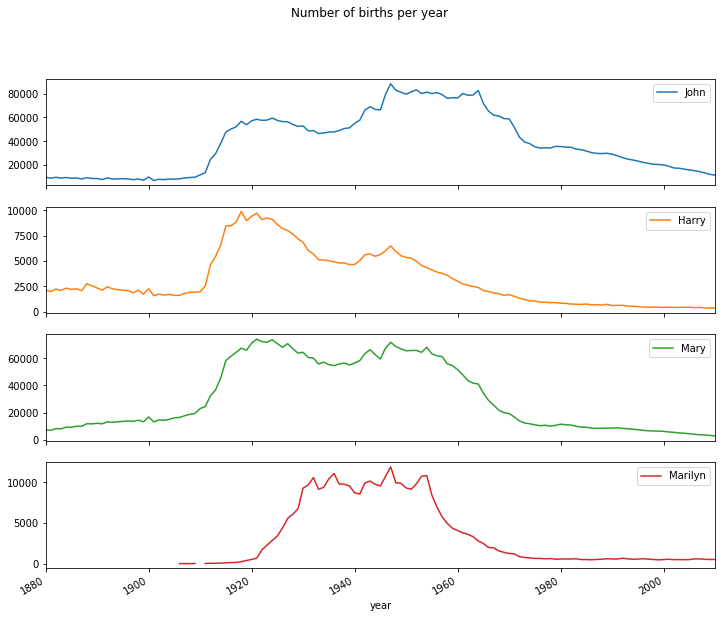

In [155]:
subset.plot(subplots= True, figsize = (12,10),title = "Number of births per year")

C:\Users\cx\Anaconda3\lib\site-packages\pandas\core\reshape\pivot.py:135: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)
C:\Users\cx\Anaconda3\lib\site-packages\pandas\core\reshape\pivot.py:135: FutureWarning: 'sex' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)


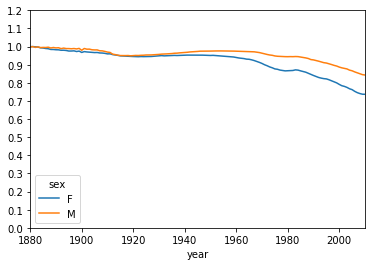

In [159]:
import numpy as np 
top1000.pivot_table("prop", index= "year", columns="sex",aggfunc = sum).plot(yticks=np.linspace(0,1.2,13))

In [160]:
df = boys[boys.year == 2010]

In [161]:
df

names sex  birth  year      prop
sex year                                                
M   2010 1676644        Jacob   M  21875  2010  0.011523
         1676645        Ethan   M  17866  2010  0.009411
         1676646      Michael   M  17133  2010  0.009025
         1676647       Jayden   M  17030  2010  0.008971
         1676648      William   M  16870  2010  0.008887
         1676649    Alexander   M  16634  2010  0.008762
         1676650         Noah   M  16281  2010  0.008576
         1676651       Daniel   M  15679  2010  0.008259
         1676652        Aiden   M  15403  2010  0.008114
         1676653      Anthony   M  15364  2010  0.008093
         1676654       Joshua   M  15238  2010  0.008027
         1676655        Mason   M  14728  2010  0.007758
         1676656  Christopher   M  14135  2010  0.007446
         1676657       Andrew   M  14093  2010  0.007424
         1676658        David   M  14042  2010  0.007397
         1676659      Matthew   M  13954  2010  0.007350
         1676660        Logan   M  13943  2010  0.007345
         1676661       Elijah   M  13735  2010  0.007235
         1676662        James   M  13714  2010  0.007224
         1676663       Joseph   M  13657  2010  0.007194
         1676664      Gabriel   M  12722  2010  0.006701
         1676665     Benjamin   M  12280  2010  0.006469
         1676666         Ryan   M  11886  2010  0.006261
         1676667       Samuel   M  11776  2010  0.006203
         1676668      Jackson   M  11693  2010  0.006159
         1676669         John   M  11424  2010  0.006018
         1676670       Nathan   M  11269  2010  0.005936
         1676671     Jonathan   M  11028  2010  0.005809
         1676672    Christian   M  10965  2010  0.005776
         1676673         Liam   M  10852  2010  0.005716
...                       ...  ..    ...   ...       ...
         1677617         Yair   M    201  2010  0.000106
         1677616        Talan   M    201  2010  0.000106
         1677614        Keyon   M    201  2010  0.000106
         1677613         Kael   M    201  2010  0.000106
         1677618     Demarion   M    200  2010  0.000105
         1677619       Gibson   M    200  2010  0.000105
         1677620       Reagan   M    200  2010  0.000105
         1677621    Cristofer   M    199  2010  0.000105
         1677622       Daylen   M    199  2010  0.000105
         1677623       Jordon   M    199  2010  0.000105
         1677624      Dashawn   M    198  2010  0.000104
         1677625        Masen   M    198  2010  0.000104
         1677629        Rowen   M    197  2010  0.000104
         1677631       Yousef   M    197  2010  0.000104
         1677630     Thaddeus   M    197  2010  0.000104
         1677628        Kadin   M    197  2010  0.000104
         1677627       Dillan   M    197  2010  0.000104
         1677626     Clarence   M    197  2010  0.000104
         1677634        Slade   M    196  2010  0.000103
         1677632      Clinton   M    196  2010  0.000103
         1677633      Sheldon   M    196  2010  0.000103
         1677636      Keshawn   M    195  2010  0.000103
         1677637     Menachem   M    195  2010  0.000103
         1677635       Joziah   M    195  2010  0.000103
         1677638       Bailey   M    194  2010  0.000102
         1677639       Camilo   M    194  2010  0.000102
         1677640       Destin   M    194  2010  0.000102
         1677641       Jaquan   M    194  2010  0.000102
         1677642       Jaydan   M    194  2010  0.000102
         1677645       Maxton   M    193  2010  0.000102

[1000 rows x 5 columns]

In [162]:
prop_cumsum = df.sort_index(by = "prop", ascending= False).prop.cumsum()

C:\Users\cx\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


In [181]:
int(prop_cumsum.searchsorted(0.5))

116

In [182]:
def get_quantile_count(group, q = 0.5):
    group = group.sort_index(by = "prop", ascending= False)
    return int(group.prop.cumsum().searchsorted(q))+1

In [183]:
density = top1000.groupby(['sex','year']).apply(get_quantile_count)

C:\Users\cx\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'sex' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.
C:\Users\cx\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.
C:\Users\cx\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  


In [184]:
density = density.unstack("sex")

In [185]:
density

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16
1885,40,16
1886,41,16
1887,41,17
1888,42,17


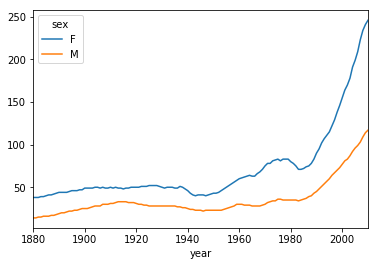

In [186]:
density.plot()

In [190]:
a = np.random.randn(100,100)
%timeit np.dot(a,a)

172 µs ± 17.4 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [214]:
import numpy as np
data = [4,5,6,7,4.3]
arr = np.array(data,dtype= int)

In [220]:
arr1 = np.asarray(data)

In [221]:
arr1

array([ 4. ,  5. ,  6. ,  7. ,  4.3])

In [198]:
arr.dtype
arr.shape

(5,)

In [199]:
np.zeros(10)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [216]:
aa = np.zeros((3,6))
np.ones_like(aa)

array([[ 1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.]])

In [202]:
range(10)

range(0, 10)

In [203]:
print(range(10))

range(0, 10)


In [210]:
a = [range(10)]

[range(0, 10)]

In [213]:
np.arange(16)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

## 利用数组进行数据处理

In [2]:
import numpy as np
points = np.arange(-5,5,0.01)

In [4]:
xs,ys = np.meshgrid(points, points)

In [5]:
import matplotlib.pyplot as plt

In [6]:
z = np.sqrt(xs ** 2 + ys ** 2)

In [10]:
%matplotlib inline

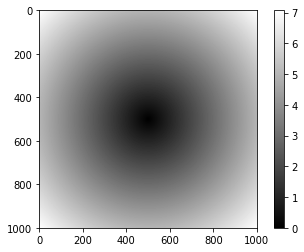

In [11]:
plt.imshow(z,cmap = plt.cm.gray);plt.colorbar()

In [13]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])

In [15]:
cond = np.array([True, False, True, True, False])

In [19]:
import random 
arr = randn(100)

NameError: name 'randn' is not defined

In [23]:
arr = np.random.randn(8)

In [24]:
(arr>0).sum()

1

In [25]:
arr.sort()

In [26]:
arr

array([-1.34845684, -0.91614327, -0.85307538, -0.81179374, -0.49446469,
       -0.4818892 , -0.38724604,  1.98201428])

In [27]:
arr = np.random.randn(5,3)

In [28]:
arr.sort()

In [29]:
arr

array([[-0.10010626,  0.30990303,  1.50150699],
       [-0.99211344, -0.37952724,  0.42243327],
       [-0.60235056,  0.30282076,  1.39406646],
       [-1.44216618, -1.37280233, -0.74769637],
       [-0.55093643,  0.09752747,  0.48429262]])

In [30]:
arr.sort(1)

In [31]:
arr

array([[-0.10010626,  0.30990303,  1.50150699],
       [-0.99211344, -0.37952724,  0.42243327],
       [-0.60235056,  0.30282076,  1.39406646],
       [-1.44216618, -1.37280233, -0.74769637],
       [-0.55093643,  0.09752747,  0.48429262]])

## random walk

In [32]:
import random

In [43]:
position = 0 
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0,1) else -1
    position += step
    walk.append(position)
%matplotlib inline

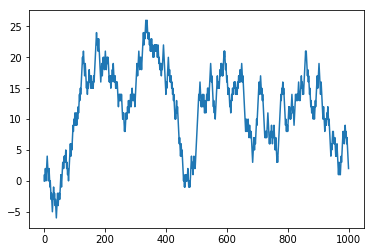

In [46]:
plt.plot(walk)

In [95]:
nwalks = 5000
nsteps = 1000

draws = np.random.randint(0, 2, size = (nwalks, nsteps))

steps = np.where(draws > 0 , 1, -1)

walks = steps.cumsum(1)

In [96]:
walks

array([[  1,   0,   1, ..., -50, -51, -50],
       [ -1,   0,   1, ...,   0,   1,   0],
       [ -1,   0,  -1, ..., -42, -41, -40],
       ..., 
       [ -1,   0,  -1, ...,  44,  43,  44],
       [  1,   2,   3, ..., -34, -35, -34],
       [ -1,   0,  -1, ...,  26,  27,  26]], dtype=int32)

In [97]:
walks.max()

123

In [98]:
walk.min()

-1717

In [99]:
hist30 = (np.abs(walks) >= 30).any(1)

In [100]:
hist30

array([ True,  True,  True, ...,  True,  True, False], dtype=bool)

In [101]:
np.abs(walks) >= 30

array([[False, False, False, ...,  True,  True,  True],
       [False, False, False, ..., False, False, False],
       [False, False, False, ...,  True,  True,  True],
       ..., 
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ..., False, False, False]], dtype=bool)

In [102]:
hist30.sum()

3374

In [103]:
crossing_times = (np.abs(walks[hist30])>=30).argmax(1)

In [104]:
crossing_times.mean()

505.86069946650861

## pandas 入门

In [106]:
import pandas as pd
from pandas import Series,DataFrame

In [107]:
obj = Series([4,7,5,-3])

In [108]:
obj 

0    4
1    7
2    5
3   -3
dtype: int64

In [110]:
obj.values

array([ 4,  7,  5, -3], dtype=int64)

In [111]:
obj.index

RangeIndex(start=0, stop=4, step=1)

In [112]:
obj2 = Series([4,7,5,-3], index = ['a','b','c','d'])

In [113]:
obj2

a    4
b    7
c    5
d   -3
dtype: int64

In [115]:
obj2.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [119]:
obj2.a

4

In [120]:
obj2[obj2 > 0]

a    4
b    7
c    5
dtype: int64

In [121]:
np.exp(obj2)

a      54.598150
b    1096.633158
c     148.413159
d       0.049787
dtype: float64

In [122]:
2 in obj2

False

In [123]:
"a" in obj2

True

In [129]:
data = DataFrame(np.arange(16).reshape(4,4),index = ["ohio","colorado","utah","new york"], columns = ["one",'tow',"three","four"])

In [133]:
data[data < 5] = 0

In [134]:
data

,one,tow,three,four
ohio,0,0,0,0
colorado,0,5,6,7
utah,8,9,10,11
new york,12,13,14,15


In [135]:
data.loc["colorado", ['tow','three']]

tow      5
three    6
Name: colorado, dtype: int32

In [138]:
data.loc[[:],[3,0,1]]

SyntaxError: invalid syntax (<ipython-input-138-df0983c2486c>, line 1)

In [150]:
data.iloc[2]

one       8
tow       9
three    10
four     11
Name: utah, dtype: int32

In [154]:
arr = np.arange(12.).reshape(3,4)

In [155]:
arr

array([[  0.,   1.,   2.,   3.],
       [  4.,   5.,   6.,   7.],
       [  8.,   9.,  10.,  11.]])

In [156]:
arr[0]

array([ 0.,  1.,  2.,  3.])

In [158]:
arr - arr[0]

array([[ 0.,  0.,  0.,  0.],
       [ 4.,  4.,  4.,  4.],
       [ 8.,  8.,  8.,  8.]])

In [169]:
frame = DataFrame(np.arange(12.).reshape((4,3)),columns=list("bde"), index = ['Utah','Ohio','Texas','Oregon'])

In [170]:
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [171]:
serise = frame.iloc[0]

In [172]:
serise

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

In [173]:
frame - serise

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


In [174]:
serise2 = Series(range(3), index = list('bef'))

In [175]:
serise2

b    0
e    1
f    2
dtype: int32

In [176]:
frame - serise2

,b,d,e,f
Utah,0.0,NaN,1.0,NaN
Ohio,3.0,NaN,4.0,NaN
Texas,6.0,NaN,7.0,NaN
Oregon,9.0,NaN,10.0,NaN


In [178]:
serise3 = frame.d

In [180]:
frame.sub(serise3, axis = 0)

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


In [181]:
frame = DataFrame(np.random.randn(4,3), )

In [182]:
frame

,0,1,2
0,-0.531719,-0.566308,0.969226
1,1.936548,0.269613,-0.581898
2,0.393356,-0.987596,-1.731098
3,-0.208407,0.018594,-0.223999


In [183]:
np.abs(frame)

,0,1,2
0,0.531719,0.566308,0.969226
1,1.936548,0.269613,0.581898
2,0.393356,0.987596,1.731098
3,0.208407,0.018594,0.223999


In [184]:
f = lambda x :x.max() - x.min()

In [185]:
frame.apply(f)

0    2.468267
1    1.257209
2    2.700324
dtype: float64

In [186]:
frame.apply(f, axis = 1)

0    1.535534
1    2.518447
2    2.124454
3    0.242593
dtype: float64

In [187]:
def f(x):
    return Series([x.min(), x.max()], index = ['min','max'])

In [188]:
frame.apply(f)

,0,1,2
min,-0.531719,-0.987596,-1.731098
max,1.936548,0.269613,0.969226


In [189]:
f = lambda x :"%.2f"%x

In [191]:
frame.applymap(f)

,0,1,2
0,-0.53,-0.57,0.97
1,1.94,0.27,-0.58
2,0.39,-0.99,-1.73
3,-0.21,0.02,-0.22


## sort 排序|

In [11]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series

In [12]:
obj = Series(range(4), index = ['d','a','b','c'])

In [13]:
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int32

In [15]:
np.sort(obj)

array([0, 1, 2, 3])

In [16]:
frame = DataFrame(np.arange(8).reshape((2, 4)), index = ["three",'one'], columns = ['d','a','b','c'] )

In [17]:
frame

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [18]:
frame.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [19]:
frame.sort_index(axis=1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [20]:
frame.sort_index(axis = 1, ascending = False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


In [24]:
frame.sort_values(by = ["d"],ascending = False)

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [29]:
frame.min(axis =1)

three    0
one      4
dtype: int32

In [30]:
frame.max()

d    4
a    5
b    6
c    7
dtype: int32

In [33]:
frame.diff()

,d,a,b,c
three,NaN,NaN,NaN,NaN
one,4.0,4.0,4.0,4.0


In [34]:
import pandas.io.data as web

all_data = {}
for ticker in ["AAPL","IBM","MSFT","GOOG"]:
    all_data[ticker] = web.get_data_yahoo(ticker, "1/1/2000","1/1/2010")

price = DataFrame({tic: data["Adj Close"] for 
                      tic, data in all_data.iteritems()})

ImportError: The pandas.io.data module is moved to a separate package (pandas-datareader). After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.

### 处理缺失数据

In [1]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np

In [2]:
df = DataFrame(np.random.randn(4,3))

In [3]:
df

,0,1,2
0,0.785293,1.568706,1.813400
1,1.903317,0.389343,1.564406
2,1.609968,-0.717617,-0.892722
3,1.269356,0.689584,-0.519516


In [4]:
df.loc[1,1]

0.38934264294125204

In [5]:
df.iloc[1,1]

0.38934264294125204

In [6]:
df.columns = list("abc")

In [7]:
df

,a,b,c
0,0.785293,1.568706,1.813400
1,1.903317,0.389343,1.564406
2,1.609968,-0.717617,-0.892722
3,1.269356,0.689584,-0.519516


In [10]:
df.loc[1,"b"]

0.38934264294125204

In [11]:
df.iloc[1,1]

0.38934264294125204

In [12]:
df.loc[1:,"b"] = np.nan

In [13]:
df

,a,b,c
0,0.785293,1.568706,1.813400
1,1.903317,NaN,1.564406
2,1.609968,NaN,-0.892722
3,1.269356,NaN,-0.519516


In [20]:
df.fillna(method="ffill", inplace = True)

In [21]:
df

,a,b,c
0,0.785293,1.568706,1.813400
1,1.903317,1.568706,1.564406
2,1.609968,1.568706,-0.892722
3,1.269356,1.568706,-0.519516


## 数据的读取存储

In [23]:
%pwd

'C:\\Users\\cx\\Documents\\Python Scripts'

## 数据的清理转换重塑合并

In [54]:
df1 = DataFrame({"key":["b","b","a","c","a","a",'b'],"data1" : range(7)})
df2 = DataFrame({"key":["a",'b','d'], 'data2':range(3)})

In [55]:
df1

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


In [50]:
df2

,data2,rkey
0,0,a
1,1,b
2,2,d


In [53]:
pd.merge(df1,df2,left_on = "lkey", right_on ="rkey")

,data1,lkey,data2,rkey
0,0,b,1,b
1,1,b,1,b
2,6,b,1,b
3,2,a,0,a
4,4,a,0,a
5,5,a,0,a


In [44]:
pd.merge(df1, df2)

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


In [47]:
pd.merge(df2,df1,on = "key")

,data2,key,data1
0,0,a,2
1,0,a,4
2,0,a,5
3,1,b,0
4,1,b,1
5,1,b,6


In [56]:
pd.merge(df1,df2,how= 'outer')

,data1,key,data2
0,0.0,b,1.0
1,1.0,b,1.0
2,6.0,b,1.0
3,2.0,a,0.0
4,4.0,a,0.0
5,5.0,a,0.0
6,3.0,c,NaN
7,NaN,d,2.0


In [57]:
df3 = DataFrame({"key":["b","b","a","c","a","b"],"data1" : range(6)})

In [58]:
df4 = DataFrame({"key": ['a','b','a','b','d'], 'data2': range(5)})

In [67]:
pd.merge(df3,df4, how= "inner", on = 'key')

,data1,key,data2
0,0,b,1
1,0,b,3
2,1,b,1
3,1,b,3
4,5,b,1
5,5,b,3
6,2,a,0
7,2,a,2
8,4,a,0
9,4,a,2


In [63]:
pd.merge(df3,df4, on = 'key')

,data1,key,data2
0,0,b,1
1,0,b,3
2,1,b,1
3,1,b,3
4,5,b,1
5,5,b,3
6,2,a,0
7,2,a,2
8,4,a,0
9,4,a,2


## 使用 matplotlib 进行可视化

In [35]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [36]:
fig = plt.figure()

In [37]:
ax1 = fig.add_subplot(2,2,1)

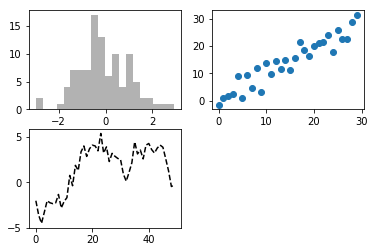

In [38]:
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax3.plot(randn(50).cumsum(),'k--')
ax2.scatter(np.arange(30),np.arange(30)+3*randn(30))
ax1.hist(randn(100),bins =20, color= "k",alpha =0.3 )
fig

In [39]:
from numpy.random import randn

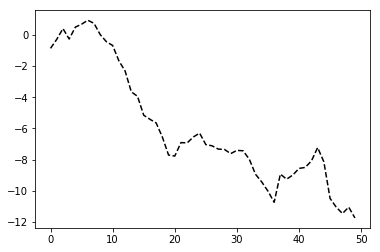

In [40]:
plt.plot(randn(50).cumsum(),'k--')

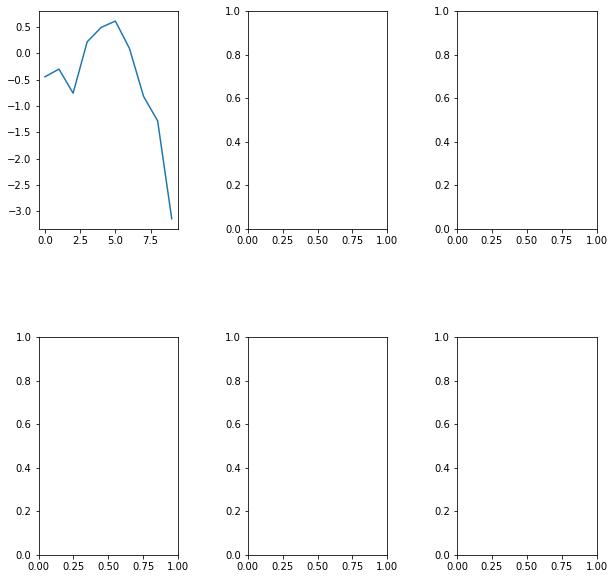

In [98]:
fig , axes = plt.subplots(2,3, figsize = (10,10))
fig.subplots_adjust(left = None, bottom = None, right = None, top = None, wspace =.5, hspace = .5)
axes[0,0].plot(randn(10).cumsum())

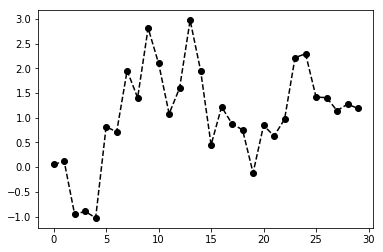

In [64]:
plt.plot(randn(30).cumsum(),"ko--")

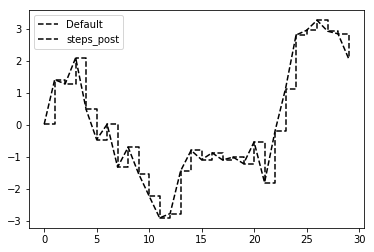

In [70]:
data = randn(30).cumsum()
plt.plot(data,"k--", label = "Default")
plt.plot(data,"k--", drawstyle = "steps-post",label = "steps_post")
plt.legend(loc = "best")

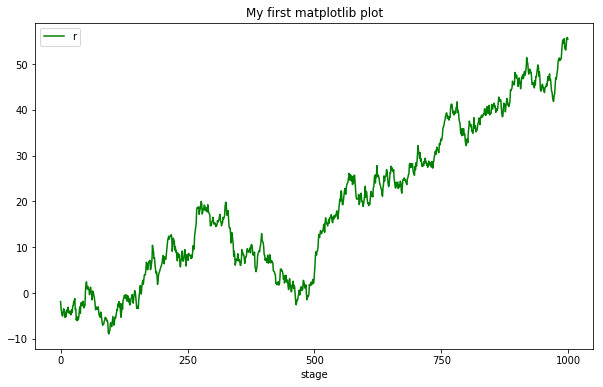

In [94]:
fig = plt.figure(figsize=(10,6));ax = fig.add_subplot(1,1,1)
ax.set_xticks([0,250,500,750,1000])
ax.set_title("My first matplotlib plot")
ax.set_xlabel("stage")
ax.plot(randn(1000).cumsum(),"g-",label = "r")
ax.legend(loc = "best")

## pandas 的默认绘图方法演示

In [99]:
import pandas as pd
from pandas  import DataFrame, Serieses

In [100]:
s = Series(randn(10).cumsum(), index = np.arange(0,100,10))

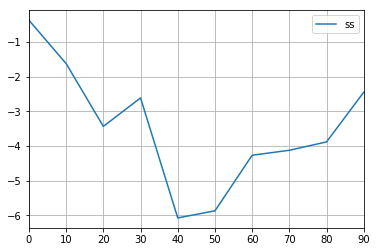

In [120]:
s.plot(grid = True,legend =True, label = "ss")

In [106]:
df = DataFrame(randn(10,4).cumsum(0),columns= list("ABCD"), index = np.arange(1,100,10))
df

,A,B,C,D
1,0.734599,-0.208321,0.420449,-1.170125
11,2.350368,0.823916,-0.354323,-0.850377
21,3.238086,1.214887,0.180354,-1.008496
31,2.648038,0.581972,2.075488,-1.156144
41,2.427456,1.814791,1.556633,-1.031595
51,0.889895,2.172756,1.034189,-1.016508
61,0.203699,3.557072,1.753437,-1.427239
71,0.300488,3.255728,2.771550,-1.493018
81,1.032493,4.096607,3.298061,-1.848080
91,0.303674,3.977301,2.181243,-1.820272


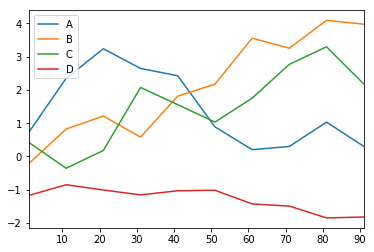

In [108]:
df.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DB11AE7B70>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001DB11A48B38>], dtype=object)

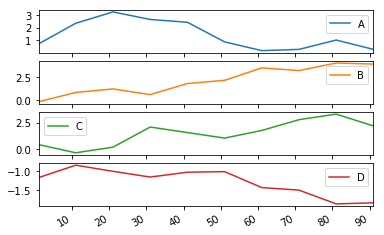

In [111]:
df.plot(subplots=True)

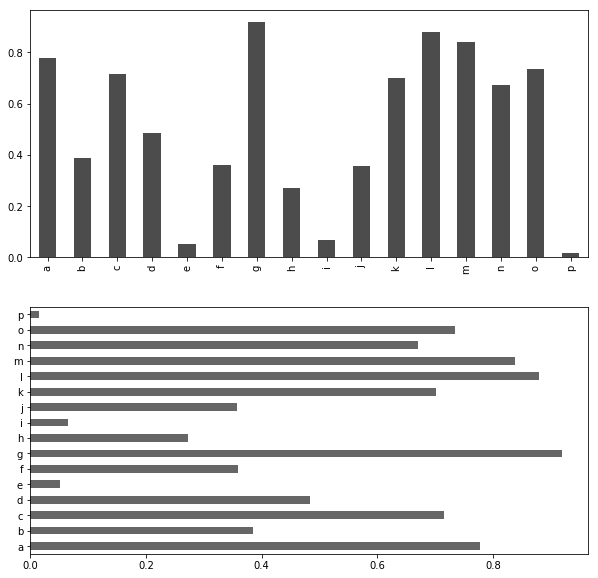

In [125]:
fig ,axes = plt.subplots(2,1, figsize = (10,10))
data = Series(np.random.rand(16), index = list("abcdefghijklmnop"))
data.plot(kind = "bar",ax = axes[0], color="k", alpha = 0.7)
data.plot(kind = 'barh', ax = axes[1], color = 'k',alpha = 0.6)

In [129]:
df = DataFrame(np.random.rand(6,4), index = ['one', 'two','three','four','five','six'], columns = list("ABCD") )

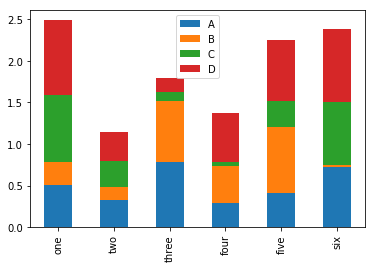

In [132]:
df.plot(kind = 'bar',stacked = True)

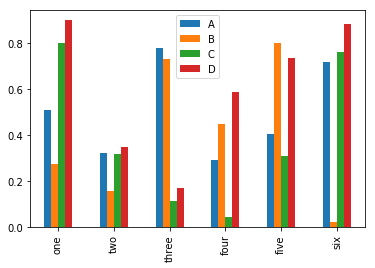

In [133]:
df.plot(kind = 'bar',stacked = False)

In [136]:
tips = pd.read_csv("C:\\Users\\cx\\Documents\\Python Scripts\\pydata-book-2nd-edition\\examples\\tips.csv")

In [155]:
party_counts = pd.crosstab(tips.day,tips["size"])

In [157]:
party_counts = party_counts.loc[:,2:5]

In [165]:
party_pcts = party_counts.div(party_counts.sum(1).astype(float),axis = 0)

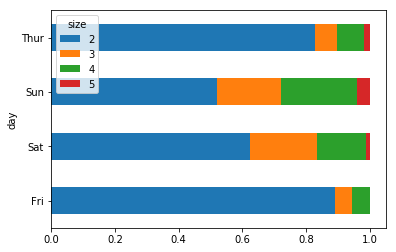

In [168]:
party_pcts.plot(kind = "barh",stacked =True)

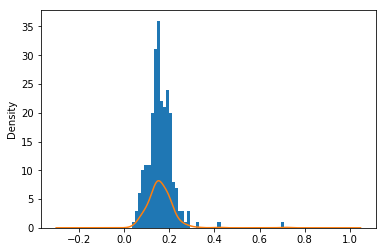

In [196]:
tips["tip_pct"] = tips['tip']/ tips['total_bill']
tips["tip_pct"].hist(bins = 50)
tips["tip_pct"].plot(kind ="kde")

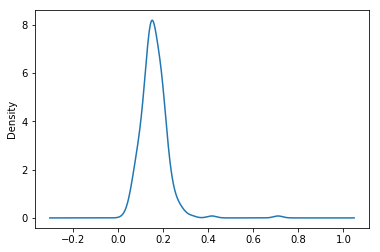

In [175]:
tips["tip_pct"].plot(kind ="kde")

In [189]:
comp1 = np.random.normal(0,1, size = 200)
comp2 = np.random.normal(10,4, size = 200)
values = Series(np.concatenate([comp1,comp2]))

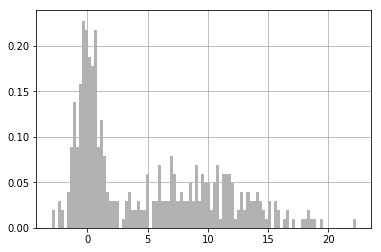

In [199]:
values.hist(bins = 100, alpha =0.3, color= "k",normed =True)

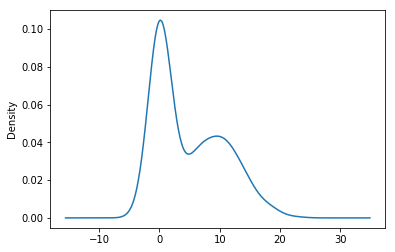

In [197]:
values.plot(kind ="kde")

In [200]:
macro = pd.read_csv('C:\\Users\\cx\\Documents\\Python Scripts\\pydata-book-2nd-edition\\examples\\macrodata.csv')

In [201]:
macro.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [202]:
data = macro[['cpi','m1','tbilrate','unemp']]

In [205]:
trans_data = np.log(data).diff().dropna()

In [207]:
trans_data.head()

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000


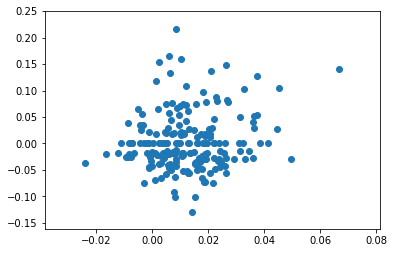

In [209]:
plt.scatter(trans_data.m1, trans_data.unemp)

C:\Users\cx\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DB18444828>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001DB197625F8>]], dtype=object)

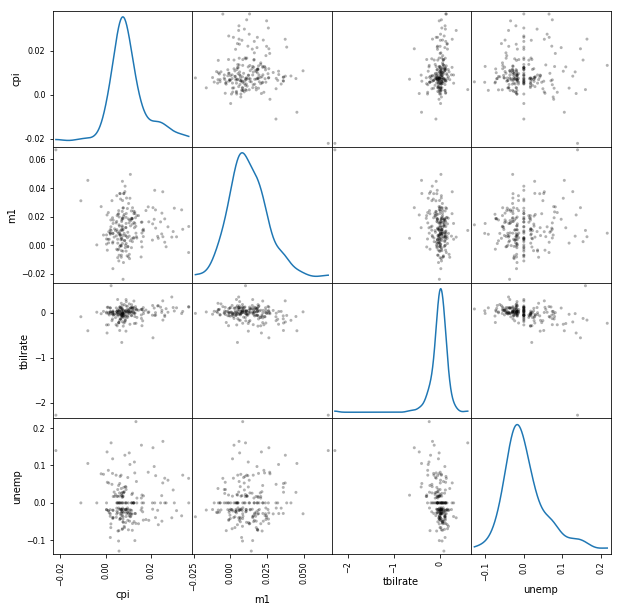

In [213]:
pd.scatter_matrix(trans_data,diagonal = "kde", color ='k', alpha =0.3,figsize = (10,10))

## 时间序列分析和金融时间序列分析

In [1]:
from datetime import datetime 
from pandas import DataFrame , Series
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
now = datetime.now()

In [4]:
now

datetime.datetime(2018, 1, 19, 10, 1, 0, 334955)

In [5]:
now.year


2018

In [6]:
now.month

1

In [7]:
now.day

19

In [8]:
delta = datetime(2011,1,7) - datetime(2008,6,24,8,15)

In [9]:
delta

datetime.timedelta(926, 56700)

In [10]:
delta.days

926

In [11]:
delta.seconds

56700

In [12]:
from datetime import timedelta

In [13]:
start = datetime(2011,1,7)

In [14]:
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [16]:
start - 2*timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

In [18]:
start.date()

datetime.date(2011, 1, 7)

In [19]:
start.time()

datetime.time(0, 0)

#### 字符串和datetime相互转换

In [20]:
stamp = datetime(2011, 1, 3)

In [21]:
str(stamp)

'2011-01-03 00:00:00'

In [25]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [26]:
value = '2011-01-03'

In [43]:
datetime.strptime(value, '%F')

ValueError: 'F' is a bad directive in format '%F'

In [41]:
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%D') for  x in datestrs]

ValueError: 'D' is a bad directive in format '%D'

In [34]:
from dateutil.parser import parse

In [35]:
parse("2011/1/1")

datetime.datetime(2011, 1, 1, 0, 0)

In [38]:
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None)

In [39]:
idx = pd.to_datetime(datestrs + [None])

In [40]:
idx

DatetimeIndex(['2011-07-06', '2011-08-06', 'NaT'], dtype='datetime64[ns]', freq=None)

In [69]:
tindex = pd.to_datetime(['2012/01/01','2012/01/02','2012/01/03','2012/01/04'])

In [70]:
ts = pd.Series(np.random.randn(4), index = tindex)

In [71]:
ts

2012-01-01    0.169329
2012-01-02    0.502070
2012-01-03    0.985921
2012-01-04    0.843789
dtype: float64

In [72]:
ts[1::2]

2012-01-02    0.502070
2012-01-04    0.843789
dtype: float64

In [73]:
stmap = ts.index[2]

In [74]:
stamp

datetime.datetime(2011, 1, 3, 0, 0)

In [75]:
ts.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04'], dtype='datetime64[ns]', freq=None)

In [77]:
ts[datetime(2012,1,4)]

0.84378902083730123

In [79]:
ts["20120104"]

0.84378902083730123

In [80]:
longer_ts = Series(np.random.randn(1000),
                  index = pd.date_range("1/1/2000", periods= 1000))

In [81]:
longer_ts

2000-01-01   -1.181708
2000-01-02   -0.156247
2000-01-03    1.144612
2000-01-04    1.757179
2000-01-05   -0.177196
2000-01-06   -0.088702
2000-01-07    0.636157
2000-01-08    1.545854
2000-01-09    0.532907
2000-01-10   -0.946584
2000-01-11   -0.682906
2000-01-12   -0.081160
2000-01-13   -0.221584
2000-01-14   -0.276079
2000-01-15    0.306007
2000-01-16    0.128808
2000-01-17    0.846979
2000-01-18    0.389096
2000-01-19   -0.264608
2000-01-20    0.912429
2000-01-21   -0.743659
2000-01-22   -1.026878
2000-01-23   -0.691993
2000-01-24    0.559747
2000-01-25    0.006104
2000-01-26    1.603923
2000-01-27   -0.947099
2000-01-28   -0.653937
2000-01-29   -1.485521
2000-01-30   -1.612774
                ...   
2002-08-28   -0.926422
2002-08-29   -1.761173
2002-08-30    0.649723
2002-08-31    0.754851
2002-09-01    0.276000
2002-09-02    2.130405
2002-09-03    0.286725
2002-09-04   -0.974193
2002-09-05    1.627493
2002-09-06    0.785604
2002-09-07    1.432523
2002-09-08   -0.762713
2002-09-09 

In [82]:
longer_ts['2001']

2001-01-01   -0.806125
2001-01-02    1.436430
2001-01-03    0.373059
2001-01-04   -0.990840
2001-01-05    1.601491
2001-01-06    1.374019
2001-01-07    0.622418
2001-01-08   -1.277847
2001-01-09    0.832579
2001-01-10    1.209621
2001-01-11   -1.233358
2001-01-12   -0.014422
2001-01-13   -1.059305
2001-01-14    0.144276
2001-01-15    1.674970
2001-01-16    0.904046
2001-01-17   -0.848405
2001-01-18    2.036551
2001-01-19    1.343296
2001-01-20    0.398705
2001-01-21    1.277579
2001-01-22   -0.833339
2001-01-23   -0.192938
2001-01-24   -0.055684
2001-01-25   -0.691724
2001-01-26   -2.327305
2001-01-27    2.262663
2001-01-28   -1.043021
2001-01-29   -0.017464
2001-01-30    0.694131
                ...   
2001-12-02    1.360406
2001-12-03    0.406099
2001-12-04   -0.301348
2001-12-05    0.993350
2001-12-06   -1.287090
2001-12-07   -0.206596
2001-12-08   -0.044552
2001-12-09   -0.274142
2001-12-10   -0.969085
2001-12-11    0.079625
2001-12-12   -0.440746
2001-12-13   -0.195081
2001-12-14 

In [84]:
longer_ts["2001-05"]

2001-05-01   -0.439414
2001-05-02    1.735320
2001-05-03   -0.182504
2001-05-04    0.905360
2001-05-05    0.368266
2001-05-06    0.756297
2001-05-07   -0.440684
2001-05-08   -0.110158
2001-05-09   -0.221288
2001-05-10   -1.545194
2001-05-11    1.246970
2001-05-12    1.280862
2001-05-13    0.425287
2001-05-14    2.315772
2001-05-15    1.436998
2001-05-16   -0.881628
2001-05-17   -0.237242
2001-05-18    0.722317
2001-05-19    1.811080
2001-05-20    0.294340
2001-05-21   -1.350141
2001-05-22    0.946366
2001-05-23   -0.852673
2001-05-24    1.543183
2001-05-25    0.851964
2001-05-26    1.060747
2001-05-27   -0.882061
2001-05-28   -0.285063
2001-05-29    0.010696
2001-05-30    1.652085
2001-05-31    0.636812
Freq: D, dtype: float64

In [91]:
longer_ts['1999-05-25':]

2000-01-01   -1.181708
2000-01-02   -0.156247
2000-01-03    1.144612
2000-01-04    1.757179
2000-01-05   -0.177196
2000-01-06   -0.088702
2000-01-07    0.636157
2000-01-08    1.545854
2000-01-09    0.532907
2000-01-10   -0.946584
2000-01-11   -0.682906
2000-01-12   -0.081160
2000-01-13   -0.221584
2000-01-14   -0.276079
2000-01-15    0.306007
2000-01-16    0.128808
2000-01-17    0.846979
2000-01-18    0.389096
2000-01-19   -0.264608
2000-01-20    0.912429
2000-01-21   -0.743659
2000-01-22   -1.026878
2000-01-23   -0.691993
2000-01-24    0.559747
2000-01-25    0.006104
2000-01-26    1.603923
2000-01-27   -0.947099
2000-01-28   -0.653937
2000-01-29   -1.485521
2000-01-30   -1.612774
                ...   
2002-08-28   -0.926422
2002-08-29   -1.761173
2002-08-30    0.649723
2002-08-31    0.754851
2002-09-01    0.276000
2002-09-02    2.130405
2002-09-03    0.286725
2002-09-04   -0.974193
2002-09-05    1.627493
2002-09-06    0.785604
2002-09-07    1.432523
2002-09-08   -0.762713
2002-09-09 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from pandas import DataFrame, Series

In [2]:
close_px_all = pd.read_csv("C:\\Users\\cx\\Documents\\Python Scripts\\pydata-book-2nd-edition\\examples\\stock_px.csv", parse_dates= True, index_col= 0)

In [4]:
close_px_all.head()

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
1990-02-01,4.98,7.86,2.87,16.79,4.27,0.51,6.04,328.79,6.12
1990-02-02,5.04,8.00,2.87,16.89,4.37,0.51,6.09,330.92,6.24
1990-02-05,5.07,8.18,2.87,17.32,4.34,0.51,6.05,331.85,6.25
1990-02-06,5.01,8.12,2.88,17.56,4.32,0.51,6.15,329.66,6.23
1990-02-07,5.04,7.77,2.91,17.93,4.38,0.51,6.17,333.75,6.33


In [5]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]

In [6]:
close_px = close_px.resample('B', fill_method= 'ffill')

C:\Users\cx\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  """Entry point for launching an IPython kernel.


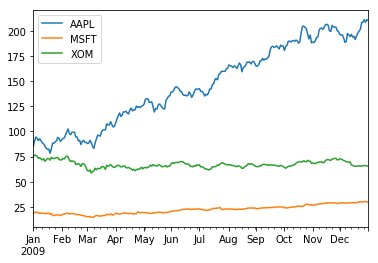

In [11]:
%matplotlib inline
close_px['2009'].plot()

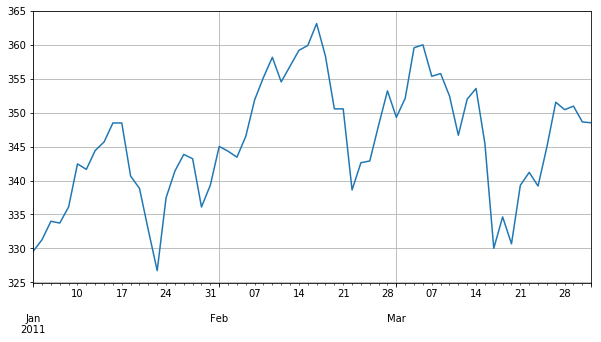

In [17]:
close_px["AAPL"].loc['01-2011':'03-2011'].plot(figsize = (10,5), grid = True)

C:\Users\cx\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=60,min_periods=50,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\cx\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=60,min_periods=0,adjust=True,ignore_na=False).mean()
  after removing the cwd from sys.path.


Text(0.5,1,'EWMA')

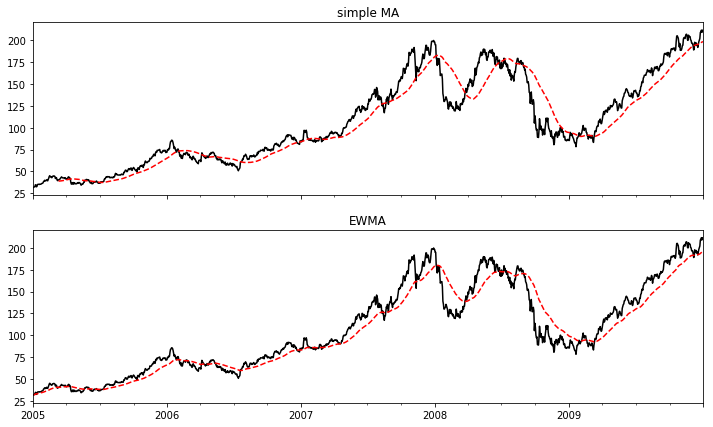

In [24]:
fig, axes = plt.subplots(nrows = 2,ncols =1, sharex= True, sharey = True, figsize = (12,7))
aapl_px = close_px["AAPL"].loc["2005":"2009"]
ma60 = pd.rolling_mean(aapl_px, 60, min_periods= 50)
ewma60 = pd.ewma(aapl_px, span = 60)

aapl_px.plot(ax=axes[0],style="k-")
ma60.plot(style="r--",ax = axes[0])
aapl_px.plot(ax=axes[1],style="k-")
ewma60.plot(ax= axes[1], style = "r--")
axes[0].set_title("simple MA")
axes[1].set_title('EWMA')

In [28]:
ma60.isnull().sum()


49

In [29]:
spx_px = close_px_all["SPX"]

In [30]:
spx_rets = spx_px.diff()/spx_px

In [32]:
spx_rets.dropna(inplace = True)

In [34]:
spx_rets

1990-02-02    0.006437
1990-02-05    0.002802
1990-02-06   -0.006643
1990-02-07    0.012255
1990-02-08   -0.002373
1990-02-09    0.001978
1990-02-12   -0.010725
1990-02-13    0.002840
1990-02-14    0.002982
1990-02-15    0.008600
1990-02-16   -0.006522
1990-02-20   -0.014421
1990-02-21   -0.000977
1990-02-22   -0.006049
1990-02-23   -0.004782
1990-02-26    0.013752
1990-02-27    0.004814
1990-02-28    0.004911
1990-03-01    0.002555
1990-03-02    0.008345
1990-03-05   -0.005393
1990-03-06    0.012399
1990-03-07   -0.002908
1990-03-08    0.009757
1990-03-09   -0.006925
1990-03-12    0.002185
1990-03-13   -0.007946
1990-03-14    0.002583
1990-03-15    0.003550
1990-03-16    0.011231
                ...   
2011-09-02   -0.025938
2011-09-06   -0.007492
2011-09-07    0.027849
2011-09-08   -0.010726
2011-09-09   -0.027438
2011-09-12    0.006917
2011-09-13    0.009038
2011-09-14    0.013300
2011-09-15    0.016897
2011-09-16    0.005674
2011-09-19   -0.009900
2011-09-20   -0.001664
2011-09-21 

In [35]:
spx_retss = spx_px / spx_px.shift(1) - 1

In [36]:
spx_retss

1990-02-01         NaN
1990-02-02    0.006478
1990-02-05    0.002810
1990-02-06   -0.006599
1990-02-07    0.012407
1990-02-08   -0.002367
1990-02-09    0.001982
1990-02-12   -0.010611
1990-02-13    0.002848
1990-02-14    0.002991
1990-02-15    0.008674
1990-02-16   -0.006480
1990-02-20   -0.014216
1990-02-21   -0.000976
1990-02-22   -0.006012
1990-02-23   -0.004759
1990-02-26    0.013944
1990-02-27    0.004838
1990-02-28    0.004936
1990-03-01    0.002561
1990-03-02    0.008415
1990-03-05   -0.005364
1990-03-06    0.012555
1990-03-07   -0.002900
1990-03-08    0.009853
1990-03-09   -0.006877
1990-03-12    0.002190
1990-03-13   -0.007884
1990-03-14    0.002589
1990-03-15    0.003562
                ...   
2011-09-02   -0.025282
2011-09-06   -0.007436
2011-09-07    0.028646
2011-09-08   -0.010612
2011-09-09   -0.026705
2011-09-12    0.006966
2011-09-13    0.009120
2011-09-14    0.013480
2011-09-15    0.017187
2011-09-16    0.005707
2011-09-19   -0.009803
2011-09-20   -0.001661
2011-09-21 

In [47]:
spx_px.diff()/ spx_px.shift(1)

1990-02-01         NaN
1990-02-02    0.006478
1990-02-05    0.002810
1990-02-06   -0.006599
1990-02-07    0.012407
1990-02-08   -0.002367
1990-02-09    0.001982
1990-02-12   -0.010611
1990-02-13    0.002848
1990-02-14    0.002991
1990-02-15    0.008674
1990-02-16   -0.006480
1990-02-20   -0.014216
1990-02-21   -0.000976
1990-02-22   -0.006012
1990-02-23   -0.004759
1990-02-26    0.013944
1990-02-27    0.004838
1990-02-28    0.004936
1990-03-01    0.002561
1990-03-02    0.008415
1990-03-05   -0.005364
1990-03-06    0.012555
1990-03-07   -0.002900
1990-03-08    0.009853
1990-03-09   -0.006877
1990-03-12    0.002190
1990-03-13   -0.007884
1990-03-14    0.002589
1990-03-15    0.003562
                ...   
2011-09-02   -0.025282
2011-09-06   -0.007436
2011-09-07    0.028646
2011-09-08   -0.010612
2011-09-09   -0.026705
2011-09-12    0.006966
2011-09-13    0.009120
2011-09-14    0.013480
2011-09-15    0.017187
2011-09-16    0.005707
2011-09-19   -0.009803
2011-09-20   -0.001661
2011-09-21 

In [41]:
spx_px / spx_px.shift(1) -1

1990-02-01         NaN
1990-02-02    0.006478
1990-02-05    0.002810
1990-02-06   -0.006599
1990-02-07    0.012407
1990-02-08   -0.002367
1990-02-09    0.001982
1990-02-12   -0.010611
1990-02-13    0.002848
1990-02-14    0.002991
1990-02-15    0.008674
1990-02-16   -0.006480
1990-02-20   -0.014216
1990-02-21   -0.000976
1990-02-22   -0.006012
1990-02-23   -0.004759
1990-02-26    0.013944
1990-02-27    0.004838
1990-02-28    0.004936
1990-03-01    0.002561
1990-03-02    0.008415
1990-03-05   -0.005364
1990-03-06    0.012555
1990-03-07   -0.002900
1990-03-08    0.009853
1990-03-09   -0.006877
1990-03-12    0.002190
1990-03-13   -0.007884
1990-03-14    0.002589
1990-03-15    0.003562
                ...   
2011-09-02   -0.025282
2011-09-06   -0.007436
2011-09-07    0.028646
2011-09-08   -0.010612
2011-09-09   -0.026705
2011-09-12    0.006966
2011-09-13    0.009120
2011-09-14    0.013480
2011-09-15    0.017187
2011-09-16    0.005707
2011-09-19   -0.009803
2011-09-20   -0.001661
2011-09-21 

In [44]:
(spx_px[1] - spx_px[0])/spx_px[0]

0.0064782992183460425

In [46]:
spx_px.diff()[1] / spx_px[0]

0.0064782992183460425

In [49]:
spx_log=np.log(spx_px)

In [51]:
spx_log.diff().dropna()

1990-02-02    0.006457
1990-02-05    0.002806
1990-02-06   -0.006621
1990-02-07    0.012330
1990-02-08   -0.002370
1990-02-09    0.001980
1990-02-12   -0.010668
1990-02-13    0.002844
1990-02-14    0.002986
1990-02-15    0.008637
1990-02-16   -0.006501
1990-02-20   -0.014318
1990-02-21   -0.000976
1990-02-22   -0.006030
1990-02-23   -0.004770
1990-02-26    0.013848
1990-02-27    0.004826
1990-02-28    0.004923
1990-03-01    0.002558
1990-03-02    0.008380
1990-03-05   -0.005379
1990-03-06    0.012477
1990-03-07   -0.002904
1990-03-08    0.009805
1990-03-09   -0.006901
1990-03-12    0.002187
1990-03-13   -0.007915
1990-03-14    0.002586
1990-03-15    0.003556
1990-03-16    0.011295
                ...   
2011-09-02   -0.025607
2011-09-06   -0.007464
2011-09-07    0.028244
2011-09-08   -0.010669
2011-09-09   -0.027069
2011-09-12    0.006942
2011-09-13    0.009079
2011-09-14    0.013390
2011-09-15    0.017041
2011-09-16    0.005690
2011-09-19   -0.009851
2011-09-20   -0.001662
2011-09-21 

In [58]:
returns = close_px.pct_change()

In [64]:
corr = pd.rolling_corr(returns, spx_rets, 125, min_periods = 100)
corr = corr['2003':]

C:\Users\cx\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_corr is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=125,min_periods=100).corr(other=<Series>)
  """Entry point for launching an IPython kernel.


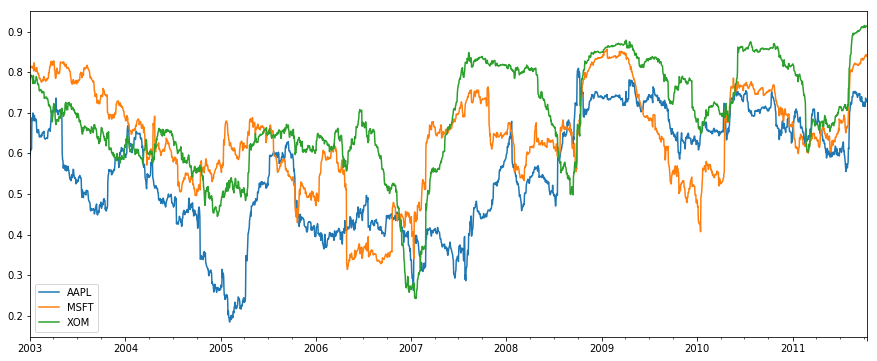

In [65]:
corr.plot(figsize = (15,6))

## 金融经济数据应用

In [66]:
ts1 = Series(np.random.randn(3), index = pd.date_range('2012-6-13', periods= 3, freq= "W-WED"))

In [68]:
ts1

2012-06-13    0.442458
2012-06-20    0.381302
2012-06-27    1.292575
Freq: W-WED, dtype: float64

In [92]:
ts1 = ts1.resample("B").ffill()

In [94]:
ts1

2012-06-13    0.442458
2012-06-14         NaN
2012-06-15         NaN
2012-06-18         NaN
2012-06-19         NaN
2012-06-20    0.381302
2012-06-21         NaN
2012-06-22         NaN
2012-06-25         NaN
2012-06-26         NaN
2012-06-27    1.292575
Freq: B, dtype: float64